In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np


from tensorflow.keras import datasets, layers, regularizers
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [2]:
import glob

class_names = ['battery', 'biological', 'brown-glass', 'paper', 'cardboard', 'plastic', 'metal', 'trash', 
            'shoes', 'clothes', 'green-glass', 'white-glass']

img_width = 64    
img_height = 64
img_channels = 3
img_size=(img_width, img_height)

data = []

def convert_images_in_class(category):
    for filename in glob.iglob(f'garbage-images/{category}/*.jpg', recursive = False): 
        imageMat = cv2.imread(filename)
        
        resized_imageMat = cv2.resize(imageMat, img_size)
        
        '''df = []
        for z in range(img_channels):
            for y in range(img_height):
                
                df.append(resized_imageMat)'''
        
        data.append(resized_imageMat)
        #print(np.array(resized_imageMat).shape)
        #print(np.array(df).shape)
        



for category in class_names:
    
    convert_images_in_class(category)
    print(f'class {category} is done converting')
print(np.array(data).shape)

class battery is done converting
class biological is done converting
class brown-glass is done converting
class paper is done converting
class cardboard is done converting
class plastic is done converting
class metal is done converting
class trash is done converting
class shoes is done converting
class clothes is done converting
class green-glass is done converting
class white-glass is done converting
(11276, 64, 64, 3)


In [3]:

#backup_data= data

labels = []
label_names = []
for category in class_names:
    labels += [[class_names.index(category)]] * len(glob.glob(f'garbage-images/{category}/*.jpg', recursive = False))
    label_names.append(category)
print(len(labels))

11276


In [4]:


train_images, data_part = train_test_split(data, test_size=0.2, random_state=5)
train_labels, label_part = train_test_split(labels, test_size=0.2, random_state=5)
#og_train_labels, og_test_labels = train_test_split(label_names, test_size=0.2, random_state=5)
validate_images, test_images = train_test_split(data_part, test_size=0.5, random_state=5)
validate_labels, test_labels = train_test_split(label_part, test_size=0.5, random_state=5)

# reformat data/pixels
train_images = np.array(train_images)
validate_images = np.array(validate_images)
test_images = np.array(test_images)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

og_train_labels, og_test_labels = train_labels, test_labels

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

#train_images, test_images = train_images / 255.0, test_images / 255.0

train_images = train_images / 255.0

test_images = test_images / 255.0

In [ ]:


plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], interpolation='nearest', cmap=plt.cm.binary)
    plt.xlabel(class_names[og_train_labels[i][0]])
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], interpolation='nearest', cmap=plt.cm.binary)
    plt.xlabel(class_names[og_test_labels[i][0]])
plt.show()

In [6]:
# test variables
epochs = 100
batch_size = 64


In [7]:
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(img_width, img_height, img_channels)), 
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)), 
    layers.Dropout(0.2),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)), 
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),  
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)), 
    layers.Dropout(0.3),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(64, activation='relu', kernel_initializer='he_uniform'),
    layers.BatchNormalization(),
    layers.Dense(12, activation='softmax', kernel_initializer='he_uniform')
])


optimizer = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy', #tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])





In [8]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(9020, 64, 64, 3)
(9020, 12)
(1128, 64, 64, 3)
(1128, 12)


In [9]:


history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(test_images, test_labels), verbose = 2)


Train on 9020 samples, validate on 1128 samples
Epoch 1/100
9020/9020 - 50s - loss: 1.6833 - accuracy: 0.4559 - val_loss: 2.4670 - val_accuracy: 0.2846
Epoch 2/100
9020/9020 - 47s - loss: 1.2586 - accuracy: 0.5733 - val_loss: 2.5259 - val_accuracy: 0.3378
Epoch 3/100
9020/9020 - 47s - loss: 1.1485 - accuracy: 0.6175 - val_loss: 1.8016 - val_accuracy: 0.4202
Epoch 4/100
9020/9020 - 47s - loss: 1.0728 - accuracy: 0.6420 - val_loss: 1.5022 - val_accuracy: 0.4894
Epoch 5/100
9020/9020 - 42s - loss: 0.9933 - accuracy: 0.6693 - val_loss: 1.5932 - val_accuracy: 0.5239
Epoch 6/100
9020/9020 - 37s - loss: 0.9357 - accuracy: 0.6803 - val_loss: 1.5854 - val_accuracy: 0.5807
Epoch 7/100
9020/9020 - 37s - loss: 0.8888 - accuracy: 0.7023 - val_loss: 2.0772 - val_accuracy: 0.5470
Epoch 8/100
9020/9020 - 37s - loss: 0.8280 - accuracy: 0.7215 - val_loss: 1.5179 - val_accuracy: 0.5975
Epoch 9/100
9020/9020 - 37s - loss: 0.8280 - accuracy: 0.7212 - val_loss: 1.7272 - val_accuracy: 0.5966
Epoch 10/100
902

1128/1128 - 1s - loss: 1.1529 - accuracy: 0.7651
test_loss: 1.1528997829197147
test_acc: 0.7650709


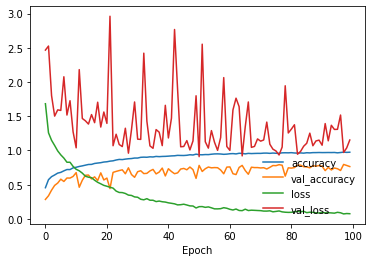

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
#plt.ylabel('Value')
#plt.xlim([0, 30])
#plt.ylim([0, 1.5])
plt.legend(loc='lower right', framealpha=0)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

